In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/USER//Downloads/bank_statement.csv")
#df.set_index("Trans. Date",inplace=True) to set the column you want as index
df.head()

,Trans. Date,Value Date,Reference,Debits,Credits,Balance,Originating Branch,Remarks
0,1-Apr-23,31-Mar-23,NaN,NaN,14000.0,16835.63,E- CHANNELS,TRANSFER BETWEEN CUSTOMERS 0902672304010859126...
1,1-Apr-23,1-Apr-23,'0GWTR,800.00,NaN,16035.63,E- CHANNELS,TRANSFER BETWEEN CUSTOMERS REF:432441063000000...
2,1-Apr-23,1-Apr-23,'0NIPG,6000.00,NaN,10035.63,E- CHANNELS,NIBSS Instant Payment Outward 0000132304011129...
3,1-Apr-23,1-Apr-23,'0NIPG,25.00,NaN,10010.63,E- CHANNELS,NIP CHARGE 0000132304011129110 TRANSFER COMMIS...
4,1-Apr-23,1-Apr-23,'0NIPG,1.87,NaN,10008.76,E- CHANNELS,VALUE ADDED TAX 00001323040111 VAT ON NIP TRAN...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trans. Date         84 non-null     object 
 1   Value Date          84 non-null     object 
 2   Reference           70 non-null     object 
 3   Debits              74 non-null     float64
 4   Credits             10 non-null     float64
 5   Balance             84 non-null     float64
 6   Originating Branch  84 non-null     object 
 7   Remarks             84 non-null     object 
dtypes: float64(3), object(5)
memory usage: 5.4+ KB


In [7]:
for col in df.columns:
    new_col = col.replace(".", "").replace(" ", "_").lower()
    df.rename(columns={col: new_col}, inplace=True)
df.columns

Index(['trans_date', 'value_date', 'reference', 'debits', 'credits', 'balance',
       'originating_branch', 'remarks'],
      dtype='object')

In [9]:
df.drop(['value_date','reference'],axis=1,inplace=True)
df.columns

Index(['trans_date', 'debits', 'credits', 'balance', 'originating_branch',
       'remarks'],
      dtype='object')

In [11]:
df.isna().sum()

trans_date             0
debits                10
credits               74
balance                0
originating_branch     0
remarks                0
dtype: int64

In [13]:
null_rows = np.where(pd.isnull(df.trans_date))[0]

df.drop(labels=null_rows, inplace=True)

df.isna().sum()

trans_date             0
debits                10
credits               74
balance                0
originating_branch     0
remarks                0
dtype: int64

In [15]:
df.reset_index(drop=True, inplace=True)



In [17]:
df.fillna(0, inplace=True)
df.isna().sum()

trans_date            0
debits                0
credits               0
balance               0
originating_branch    0
remarks               0
dtype: int64

In [19]:
df.head()

,trans_date,debits,credits,balance,originating_branch,remarks
0,1-Apr-23,0.00,14000.0,16835.63,E- CHANNELS,TRANSFER BETWEEN CUSTOMERS 0902672304010859126...
1,1-Apr-23,800.00,0.0,16035.63,E- CHANNELS,TRANSFER BETWEEN CUSTOMERS REF:432441063000000...
2,1-Apr-23,6000.00,0.0,10035.63,E- CHANNELS,NIBSS Instant Payment Outward 0000132304011129...
3,1-Apr-23,25.00,0.0,10010.63,E- CHANNELS,NIP CHARGE 0000132304011129110 TRANSFER COMMIS...
4,1-Apr-23,1.87,0.0,10008.76,E- CHANNELS,VALUE ADDED TAX 00001323040111 VAT ON NIP TRAN...


In [21]:
df.to_csv("/Users/USER/Downloads/statementtt_csv.csv",index=False)

# This plot shows the credits received for each day in the month of April 2023

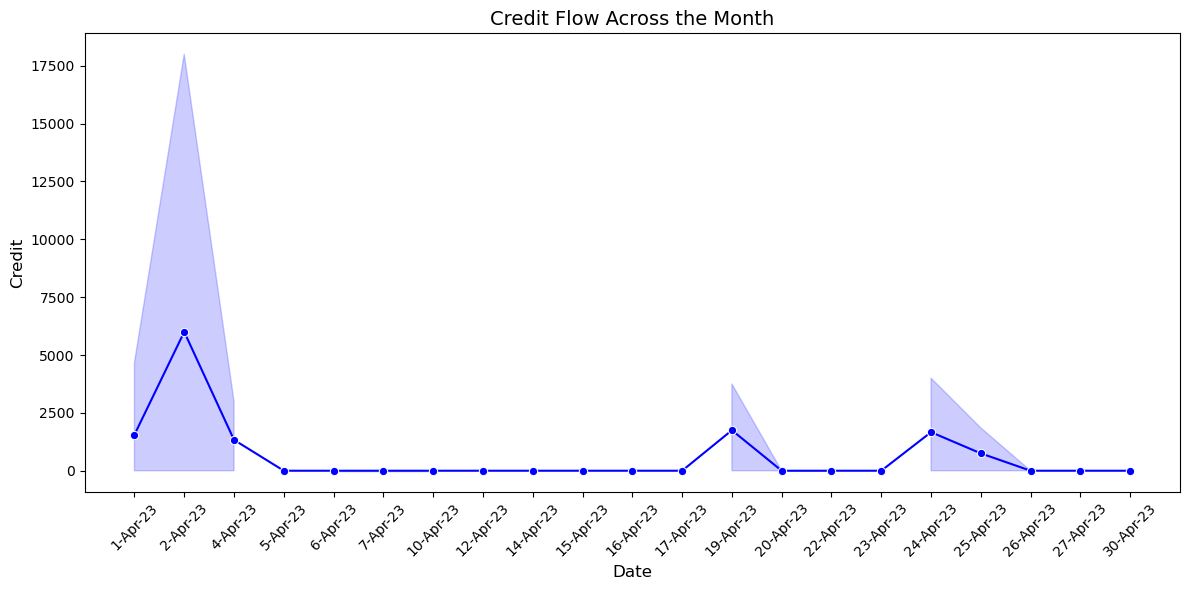

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x='trans_date',y='credits', marker='o', color='blue')
plt.title('Credit Flow Across the Month', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Credit', fontsize=12)
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.show()


# This plot shows the debits received for each day in the month of April 2023

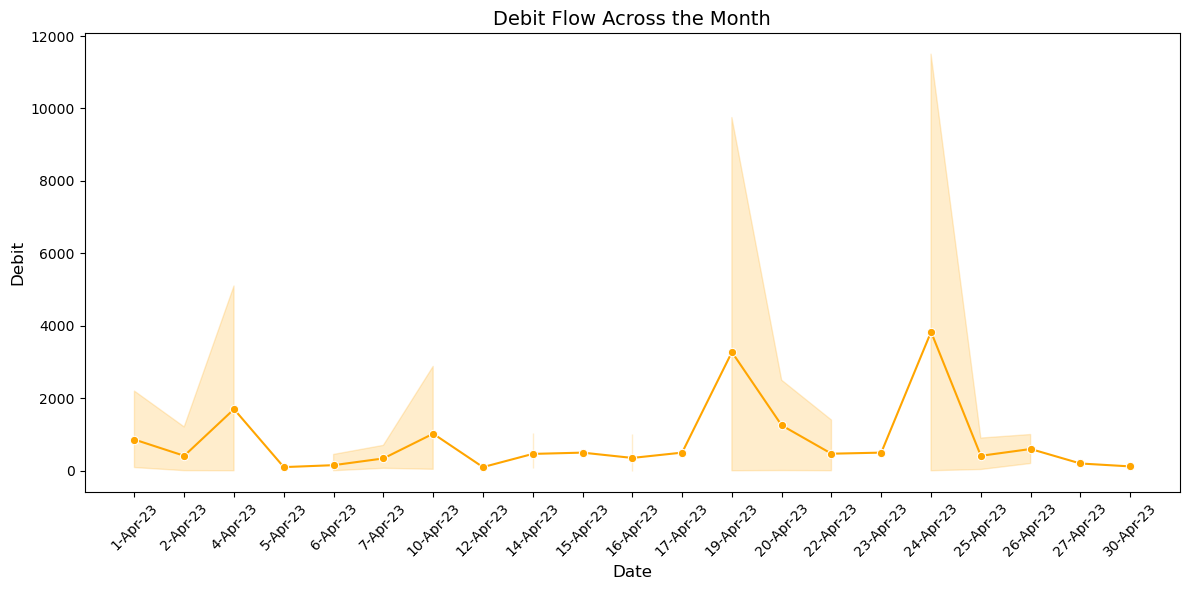

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x='trans_date',y='debits', marker='o', color='orange')
plt.title('Debit Flow Across the Month', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Debit', fontsize=12)
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.show()


# The barplot shows the total value of debits and credits received in the month of April 2023

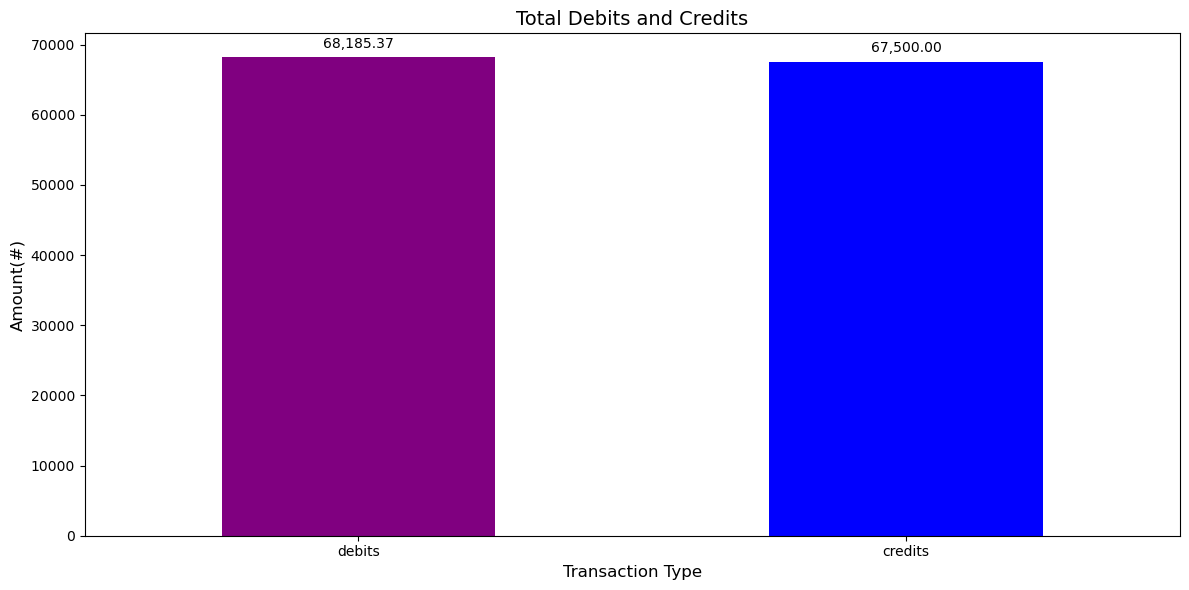

In [35]:

# Calculate total debits and credits
totals = df[['debits', 'credits']].sum()

# Plot the total debits and credits as a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = totals.plot(kind='bar', color=['purple', 'blue'], ax=ax)

# Add titles and labels for better readability
ax.set_title('Total Debits and Credits', fontsize=14)
ax.set_xlabel('Transaction Type', fontsize=12)
ax.set_ylabel('Amount(#)', fontsize=12)
ax.set_xticks(range(len(totals.index)))
ax.set_xticklabels(totals.index, rotation=0)

# Annotate the bar chart with values
for bar in bars.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
        bar.get_height() + 0.02 * max(totals),  # Y-coordinate: slightly above the bar
        f'{bar.get_height():,.2f}',  # Format the value
        ha='center', fontsize=10, color='black'
    )

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


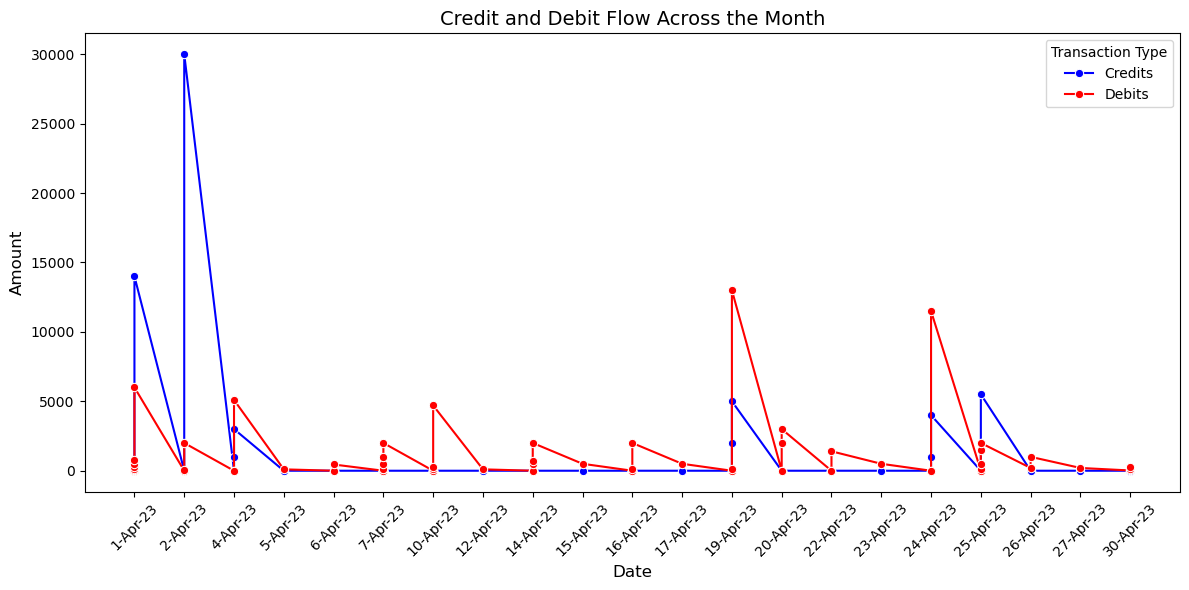

In [50]:

# Plot the credits and debits on the same chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trans_date', y='credits', marker='o', color='blue', label='Credits',estimator=None)
sns.lineplot(data=df, x='trans_date', y='debits', marker='o', color='red', label='Debits',estimator=None)

# Add title and labels
plt.title('Credit and Debit Flow Across the Month', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)

# Add legend to differentiate the lines
plt.legend(title='Transaction Type')


# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
